In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
raw_data = pd.read_csv('sma_cross_results.csv')
raw_data.head()

,Trade #,Type,Signal,Date/Time,Price USD,Contracts,Profit USD,Profit %,Cum. Profit USD,Cum. Profit %,Run-up USD,Run-up %,Drawdown USD,Drawdown %
0,2479,Exit Long,Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2479,Entry Long,My Long Entry Id,2023-10-10 18:20,4393.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2478,Exit Short,My Long Entry Id,2023-10-10 18:20,4393.25,1.0,262.5,0.12,42487.5,0.03,462.5,0.21,275.0,0.13
3,2478,Entry Short,My Short Entry Id,2023-10-10 12:20,4398.50,1.0,262.5,0.12,42487.5,0.03,462.5,0.21,275.0,0.13
4,2477,Exit Long,My Short Entry Id,2023-10-10 12:20,4398.50,1.0,1125.0,0.51,42225.0,0.11,2150.0,0.98,237.5,0.11


In [173]:
data = raw_data.copy()


data = data[2:len(data)] # Remove Open Order

data.dropna(inplace=True)

data = data.loc[ :, ['Trade #', 'Type', 'Date/Time', 'Profit USD']] # Keep Only Necessary Data

data['Type'] = np.where(data['Type'].str.contains('Short'), 'Short', 'Long')

data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Group by 'Trade #' and aggregate the mean, max, and duration
data = data.groupby('Trade #').agg({'Type': 'first', 'Profit USD' : 'first', 'Date/Time': ['min', 'max', lambda x: x.max() - x.min()]}).reset_index()

# Flatten the multi-level columns
data.columns = ['Trade #', 'Type', 'Return', 'Open Date', 'Close Date', 'Duration']


display(data.head())
data.shape


,Trade #,Type,Return,Open Date,Close Date,Duration
0,1,Long,-62.5,2022-11-20 21:30:00,2022-11-20 23:30:00,0 days 02:00:00
1,2,Short,-125.0,2022-11-20 23:30:00,2022-11-21 00:35:00,0 days 01:05:00
2,3,Long,-100.0,2022-11-21 00:35:00,2022-11-21 01:25:00,0 days 00:50:00
3,4,Short,350.0,2022-11-21 01:25:00,2022-11-21 05:10:00,0 days 03:45:00
4,5,Long,12.5,2022-11-21 05:10:00,2022-11-21 05:20:00,0 days 00:10:00


(2478, 6)

In [203]:
def reshuffle_and_plot_with_max_drawdown(df, column_name, num_iterations=1000):
    max_drawdown = 0
    max_drawdown_plot = None

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    for i in range(num_iterations):
        # Shuffle the DataFrame
        shuffled_df = df.sample(frac=1).reset_index(drop=True)

        # Calculate the cumulative sum of the specified column
        cumsum = shuffled_df[column_name].cumsum()

        # Calculate drawdown
        drawdown = cumsum - cumsum.cummax()

        # Plot the cumulative sum
        plt.plot(cumsum, color='gray', alpha=0.1)

        # Update max drawdown information
        if drawdown.min() < max_drawdown:
            max_drawdown = drawdown.min()
            max_drawdown_plot = cumsum

    plt.title(f'Cumulative Sum of {column_name} after 1000 Reshuffles')
    plt.xlabel('Index')
    plt.ylabel('Cumulative Sum')
    plt.show()

    return max_drawdown_plot

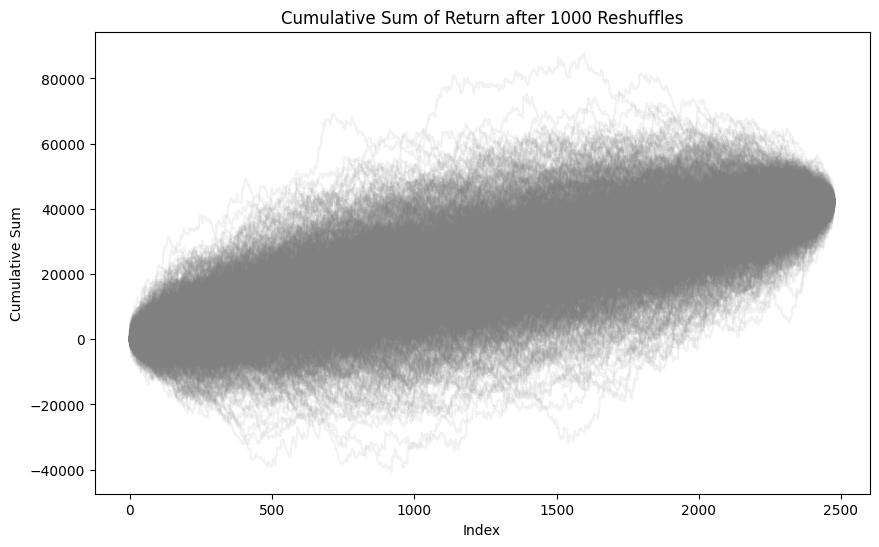

In [205]:
x = reshuffle_and_plot_with_max_drawdown(data,  'Return')

In [210]:
x.cumsum() - x.cumsum().cummax()

0              0.0
1           -175.0
2              0.0
3              0.0
4              0.0
           ...    
2473   -11094075.0
2474   -11052000.0
2475   -11010100.0
2476   -10967575.0
2477   -10925087.5
Name: Return, Length: 2478, dtype: float64